In [5]:
# Install packages
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
# Load data
df = pd.read_csv("mbti_preprocessed_features.csv", index_col= 0)

In [3]:
def create_train_test_split(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42069)
    return X_train, X_test, Y_train, Y_test

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [8]:
# Multiclass

# Determine X and Y
X = df.iloc[:, 3].values #Preprocessed_posts
Y = df.iloc[:, 2].values #EncodedType

# Vectorize
vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.3)
matrix = vectorizer.fit_transform(X)
X = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Create splits
X_train, X_test, Y_train, Y_test = create_train_test_split(X, Y)

# Train Model
rf = RandomForestClassifier()
rf = rf.fit(X_train, Y_train)

# Prediction & Evaluation
prediction = rf.predict(X_test)

types = df.iloc[:, 0].values
types = sorted(list(set(types)))

print("Classification Report:")
print(classification_report(Y_test, prediction, target_names=types))
print(sklearn.metrics.f1_score(Y_test, prediction, average ='micro'))

# Confusion Matrix
cnf = confusion_matrix(Y_test, prediction)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['I','E'])

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.60      0.11      0.18        55
        ENFP       0.69      0.39      0.50       212
        ENTJ       0.72      0.18      0.28        74
        ENTP       0.57      0.61      0.59       196
        ESFJ       0.00      0.00      0.00        11
        ESFP       0.00      0.00      0.00        14
        ESTJ       0.00      0.00      0.00        11
        ESTP       0.00      0.00      0.00        28
        INFJ       0.50      0.59      0.54       436
        INFP       0.47      0.78      0.59       545
        INTJ       0.66      0.41      0.50       365
        INTP       0.50      0.63      0.56       378
        ISFJ       0.68      0.22      0.34        58
        ISFP       0.45      0.12      0.19        73
        ISTJ       0.86      0.20      0.32        61
        ISTP       0.54      0.40      0.46        86

    accuracy                           0.52      2603
   

c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification Report:
              precision    recall  f1-score   support

 Introverted       0.79      0.99      0.88      2002
 Extroverted       0.80      0.15      0.25       601

    accuracy                           0.79      2603
   macro avg       0.80      0.57      0.57      2603
weighted avg       0.80      0.79      0.74      2603

0.7948520937379946


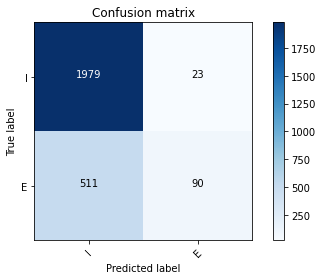

In [8]:
# Binary Extroverted-Introverted

# Determine X and Y
X = df.iloc[:, 3].values #Preprocessed_posts
Y = df.iloc[:, 4].values #extro_intro

# Vectorize
vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.3)
matrix = vectorizer.fit_transform(X)
X = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Create splits
X_train_EI, X_test_EI, Y_train_EI, Y_test_EI = create_train_test_split(X, Y)

# Train Model
rf = RandomForestClassifier()
rf = rf.fit(X_train_EI, Y_train_EI)

# Prediction & Evaluation
prediction_EI = rf.predict(X_test_EI)

types = ['Introverted', 'Extroverted']

print("Classification Report:")
print(classification_report(Y_test_EI, prediction_EI, target_names=types))
print(sklearn.metrics.f1_score(Y_test_EI, prediction_EI, average ='micro'))

# Confusion Matrix
cnf = confusion_matrix(Y_test_EI, prediction_EI)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['I','E'])

Classification Report:
              precision    recall  f1-score   support

     Sensing       0.73      0.05      0.09       342
   Intuition       0.87      1.00      0.93      2261

    accuracy                           0.87      2603
   macro avg       0.80      0.52      0.51      2603
weighted avg       0.85      0.87      0.82      2603

0.8724548597771802


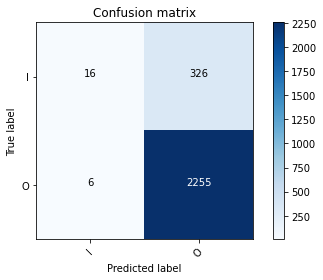

In [9]:
# Binary Sensing-Intuition

# Determine X and Y 
X = df.iloc[:, 3].values #Preprocessed_posts
Y = df.iloc[:, 5].values #intu-obs

# Vectorize
vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.3)
matrix = vectorizer.fit_transform(X)
X = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Create splits
X_train_IO, X_test_IO, Y_train_IO, Y_test_IO = create_train_test_split(X, Y)

# Train Model
rf = RandomForestClassifier()
rf = rf.fit(X_train_IO, Y_train_IO)

# Prediction & Evaluation
prediction_IO = rf.predict(X_test_IO)

types = ['Sensing', 'Intuition']

print("Classification Report:")
print(classification_report(Y_test_IO, prediction_IO, target_names=types))
print(sklearn.metrics.f1_score(Y_test_IO, prediction_IO, average ='micro'))

# Confusion Matrix
cnf = confusion_matrix(Y_test_IO, prediction_IO)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['I','O'])

In [10]:
# Binary Thinking-Feeling

# Determine X and Y 
X = df.iloc[:, 3].values #Preprocessed_posts
Y = df.iloc[:, 6].values # think - feel

# Vectorize
vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.3)
matrix = vectorizer.fit_transform(X)
X = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Create splits
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = create_train_test_split(X, Y)

# Train Model
rf = RandomForestClassifier()
rf = rf.fit(X_train_TF, Y_train_TF)

# Prediction & Evaluation
prediction_TF = rf.predict(X_test_TF)

types = ['Thinking', 'Feeling']

print("Classification Report:")
print(classification_report(Y_test_TF, prediction_TF, target_names=types))
print(sklearn.metrics.f1_score(Y_test_TF, prediction_TF, average ='micro'))

# Confusion Matrix
cnf = confusion_matrix(Y_test_TF, prediction_TF)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['T','F'])

Classification Report:
              precision    recall  f1-score   support

    Thinking       0.78      0.73      0.75      1199
     Feeling       0.78      0.82      0.80      1404

    accuracy                           0.78      2603
   macro avg       0.78      0.77      0.77      2603
weighted avg       0.78      0.78      0.78      2603

0.7767960046100654


Classification Report:
              precision    recall  f1-score   support

     Judging       0.81      0.40      0.54      1071
  Perceiving       0.69      0.94      0.80      1532

    accuracy                           0.72      2603
   macro avg       0.75      0.67      0.67      2603
weighted avg       0.74      0.72      0.69      2603

0.7164809834805993


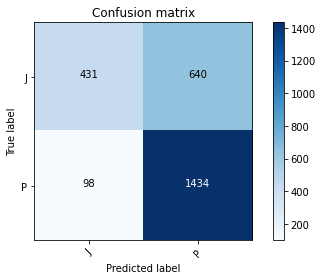

In [12]:
# Binary Judging-Perceiving

# Determine X and Y 
X = df.iloc[:, 3].values # Preprocessed_posts
Y = df.iloc[:, 7].values # prosp - judg

# Vectorize
vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.3)
matrix = vectorizer.fit_transform(X)
X = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Create splits
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = create_train_test_split(X, Y)

# Train Model
rf = RandomForestClassifier()
rf = rf.fit(X_train_JP, Y_train_JP)

# Prediction & Evaluation
prediction_JP = rf.predict(X_test_JP)

types = ['Judging', 'Perceiving']

print("Classification Report:")
print(classification_report(Y_test_JP, prediction_JP, target_names=types))
print(sklearn.metrics.f1_score(Y_test_JP, prediction_JP, average ='micro'))

# Confusion Matrix
cnf = confusion_matrix(Y_test_JP, prediction_JP)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['J','P'])

In [13]:
# Combine the 4 Binary Models
df1 = df[['encodedType', 'extro_intro', 'intu_obs', 'feel_think', 'prosp_judg']].drop_duplicates().reset_index(drop=True)

Y_test_df = pd.DataFrame(np.transpose([Y_test_EI, Y_test_JP, Y_test_IO, Y_test_TF]), 
                         columns =['extro_intro', 'intu_obs', 'feel_think', 'prosp_judg'])
Y_test_df = Y_test_df.merge(df1, how = 'left', on = Y_test_df.columns.tolist())

predict_df = pd.DataFrame(np.transpose([prediction_EI, prediction_JP, prediction_IO, prediction_TF]), 
                         columns =['extro_intro', 'intu_obs', 'feel_think', 'prosp_judg'])
predict_df = predict_df.merge(df1, how = 'left', on = predict_df.columns.tolist())

print("Classification Report:")
print(classification_report(Y_test_df['encodedType'].values, predict_df['encodedType'].values))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.31      0.42       196
           1       0.53      0.04      0.07       212
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        14
           4       0.14      0.01      0.02        74
           5       0.00      0.00      0.00        55
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        11
           8       0.32      0.71      0.44       378
           9       0.40      0.82      0.54       545
          10       0.47      0.08      0.14        86
          11       0.50      0.04      0.08        73
          12       0.52      0.25      0.34       365
          13       0.58      0.45      0.51       436
          14       0.00      0.00      0.00        61
          15       1.00      0.02      0.03        58

    accuracy                           0.42      2603
   

c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

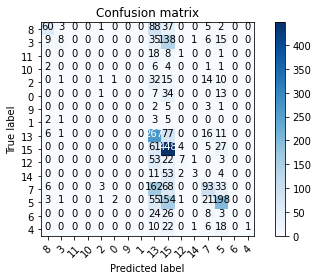

In [14]:
# plot confusion amtrix
cnf = confusion_matrix(Y_test_df['encodedType'].values, predict_df['encodedType'].values)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = df1['encodedType'])